
<h1 align="center"><b>Gold Data Analysis<b></h1>


**Author: Faryal Rifaz** 

**Date: November 2025**

**Connect:[https://www.linkedin.com/in/faryal-rifaz/]**

## **Problem statment:** 

load the dataset , clean the data ,build and compare regression models. 

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [34]:
# load the dataset
df = pd.read_csv('gold_price_data.csv')

In [35]:
# check the first few rows of the dataset
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [36]:
# lets check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5215 non-null   object 
 1   open       5215 non-null   float64
 2   high       5215 non-null   float64
 3   low        5215 non-null   float64
 4   close      5215 non-null   float64
 5   adj_close  5215 non-null   float64
 6   volume     5215 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.3+ KB


In [37]:
# lets check the shape of the dataset
df.shape

(5215, 7)

In [38]:
# lets check the descriptive statistics of the dataset
df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


In [39]:
# lets check the columns in the dataset
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [40]:
# lets check the missing values in the dataset
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [41]:
# lets check the nan values in the dataset
df.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [42]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create date-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

# Drop columns that are not useful for regression
df.drop(['date'], axis=1, inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

print("After preprocessing:")
df.head()


After preprocessing:


C:\Users\DELL\AppData\Local\Temp\ipykernel_7112\2321405741.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,open,high,low,close,adj_close,volume,year,month,day,dayofweek
0,44.380001,44.380001,44.490002,44.070000,44.430000,5992000,2004,11,18,3
1,44.779999,44.779999,44.919998,44.470001,44.490002,11655300,2004,11,19,4
2,44.950001,44.950001,44.970001,44.740002,44.750000,11996000,2004,11,22,0
3,44.750000,44.750000,44.919998,44.720001,44.880001,3169200,2004,11,23,1
4,45.049999,45.049999,45.049999,44.790001,44.930000,6105100,2004,11,24,2


In [43]:
# Define Features and Target

X = df.drop('close', axis=1)
y = df['close']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [44]:
# Train Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [45]:
# Evaluate Models
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

models = {'Linear Regression': y_pred_lr,
          'Random Forest': y_pred_rf,
          'XGBoost': y_pred_xgb}

for name, pred in models.items():
    rmse, mae, r2 = evaluate(y_test, pred)
    print(f"{name} -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")


Linear Regression -> RMSE: 0.4891, MAE: 0.3476, R²: 0.9999
Random Forest -> RMSE: 41.4323, MAE: 21.5039, R²: 0.0987
XGBoost -> RMSE: 44.4903, MAE: 23.6670, R²: -0.0393


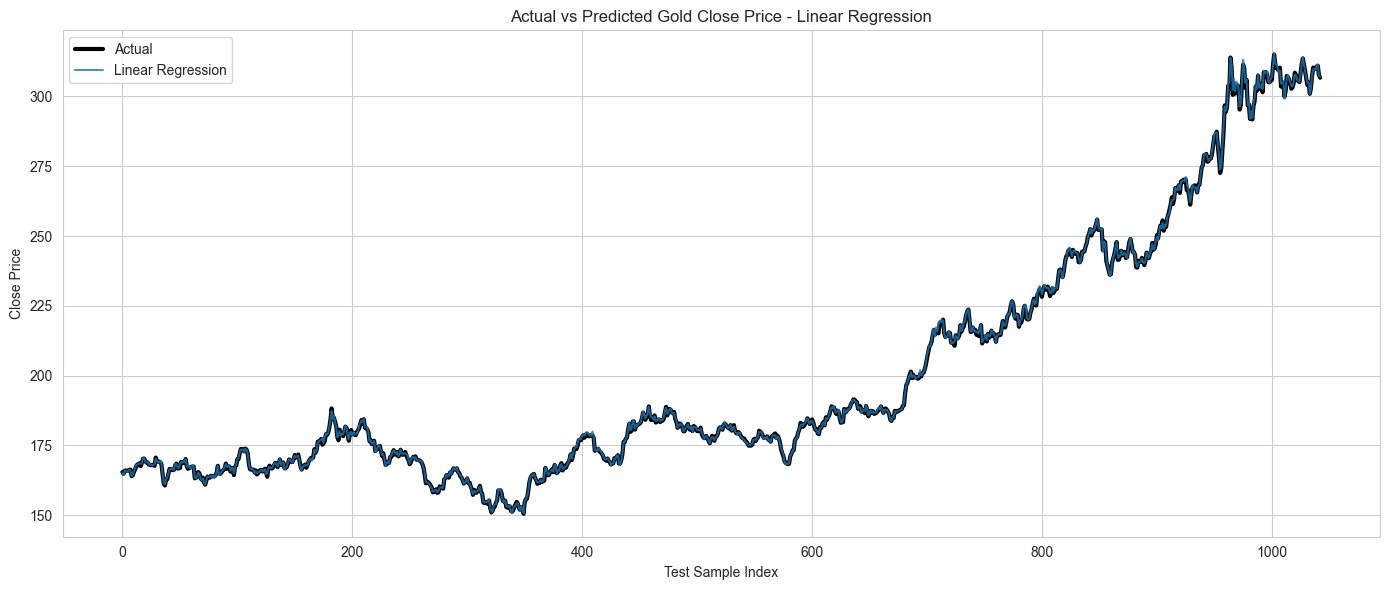

In [46]:
# Set style for the plots
sns.set_style('whitegrid')

# Ensure results DataFrame exists for plotting
try:
	results
except NameError:
	results = pd.DataFrame({
		'Actual_Close': y_test.values,
		'LR_Pred': y_pred_lr,
		'RF_Pred': y_pred_rf,
		'XGB_Pred': y_pred_xgb
	})

# Plot for Linear Regression
plt.figure(figsize=(14, 6))
plt.plot(results['Actual_Close'], label='Actual', color='black', linewidth=3)
plt.plot(results['LR_Pred'], label='Linear Regression', alpha=0.8)
plt.title('Actual vs Predicted Gold Close Price - Linear Regression')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

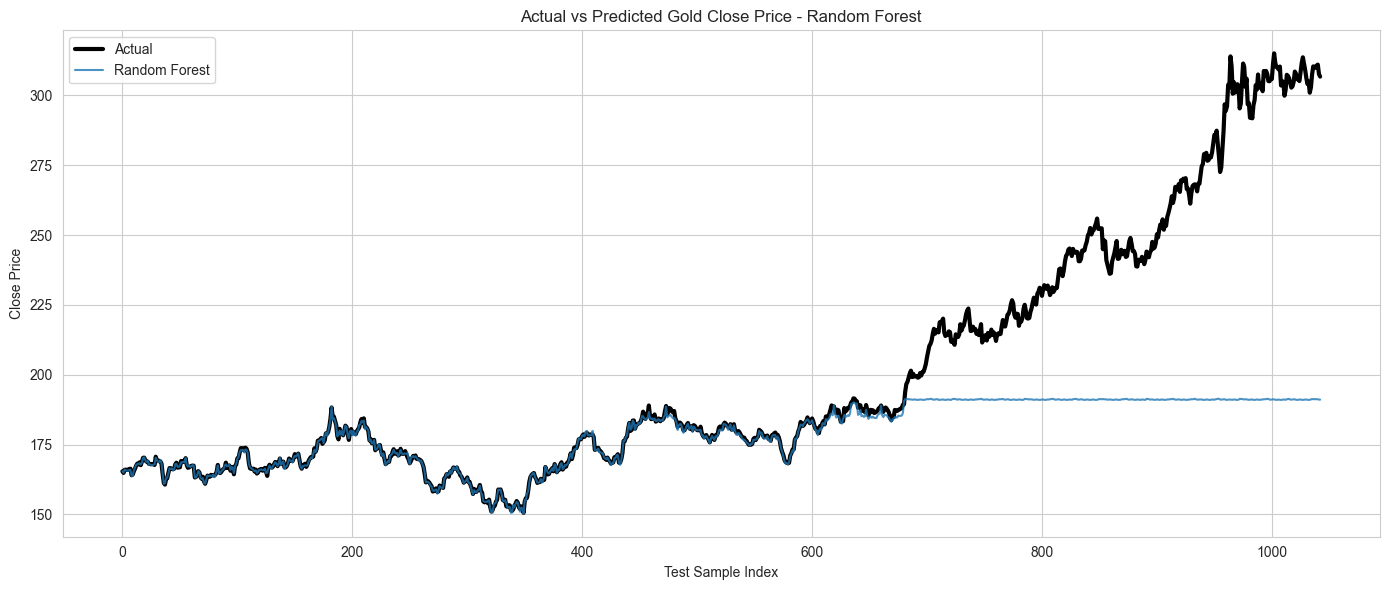

In [47]:
# Plot for Random Forest
plt.figure(figsize=(14, 6))
plt.plot(results['Actual_Close'], label='Actual', color='black', linewidth=3)
plt.plot(results['RF_Pred'], label='Random Forest', alpha=0.8)
plt.title('Actual vs Predicted Gold Close Price - Random Forest')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

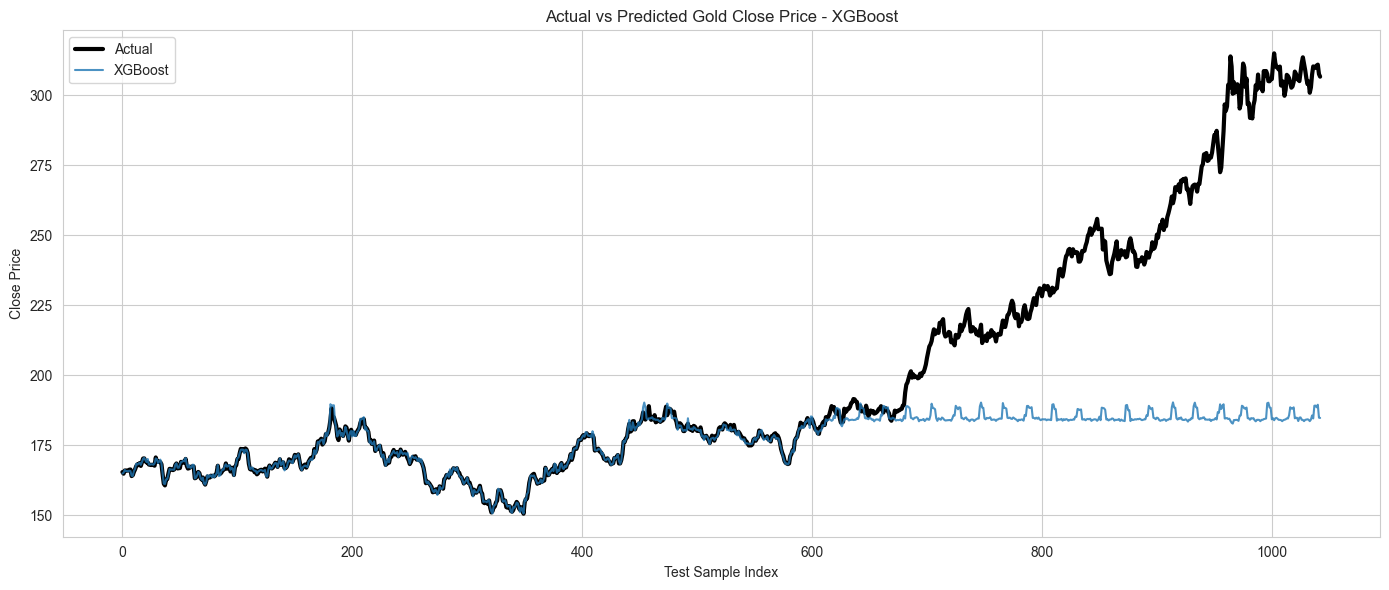

In [48]:

# Plot for XGBoost
plt.figure(figsize=(14, 6))
plt.plot(results['Actual_Close'], label='Actual', color='black', linewidth=3)
plt.plot(results['XGB_Pred'], label='XGBoost', alpha=0.8)
plt.title('Actual vs Predicted Gold Close Price - XGBoost')
plt.xlabel('Test Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
# Show Results
results = pd.DataFrame({
    'Actual_Close': y_test.values,
    'LR_Pred': y_pred_lr,
    'RF_Pred': y_pred_rf,
    'XGB_Pred': y_pred_xgb
})
print(results.head())


   Actual_Close     LR_Pred     RF_Pred    XGB_Pred
0    165.440002  165.008398  165.481198  164.918762
1    164.869995  164.437034  164.949651  165.191116
2    166.000000  166.186088  166.110001  166.189270
3    166.009995  165.707496  165.772450  165.771530
4    165.970001  165.599065  165.673299  165.816528


### Conclusion

Linear Regression performed best overall with extremely low error values (RMSE & MAE) and the highest R² value (0.9999), indicating near-perfect predictive performance for the given dataset. Random Forest and XGBoost performed comparatively poorly with high error rates and low explanatory power.

---